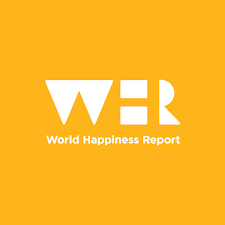

The World Happiness Report 2021 focuses on the effects of COVID-19 and how people all over the world have fared. Our aim was two-fold, first to focus on the effects of COVID-19 on the structure and quality of people’s lives, and second to describe and evaluate how governments all over the world have dealt with the pandemic. In particular, we try to explain why some countries have done so much better than others.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (15, 8)
#plt.rcParams['figure.facecolor'] = '#ff6fff'

In [5]:
data = pd.read_csv('world-happiness-report-2021.csv')

In [6]:
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [13]:
data_columns = ['Country name', 'Regional indicator', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

In [25]:
data = data[data_columns].copy()

In [30]:
happiness_df = data.rename({'Country name':'country',  'Regional indicator':'regional_indicator', 'Ladder score':'happiness_score', 'Logged GDP per capita':'GDP_per_capita', 'Social support': 'social_support', 'Healthy life expectancy':'life_expectancy','Freedom to make life choices':'freedom_to_choices', 'Generosity':'generosity', 'Perceptions of corruption':'perception_to_corruption'}, axis = 1)

In [31]:
happiness_df.head()

,country,regional_indicator,happiness_score,GDP_per_capita,social_support,life_expectancy,freedom_to_choices,generosity,perception_to_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


Text(0, 0.5, 'GDP per capita')

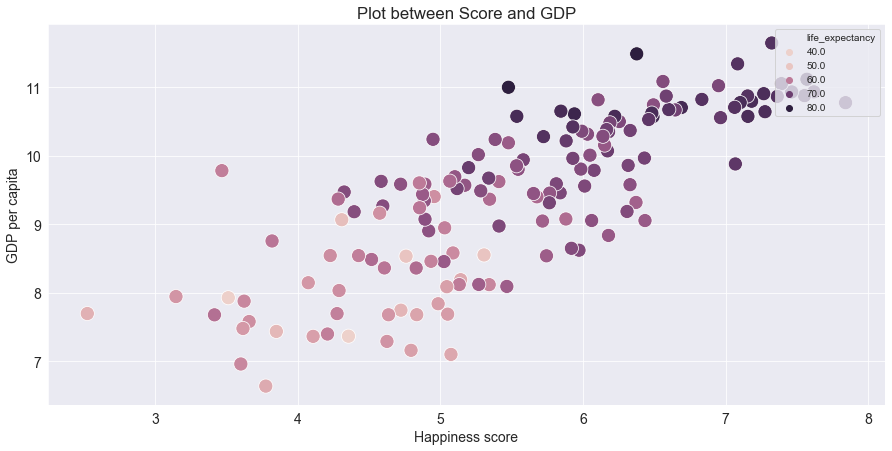

In [47]:
# Plot btw happiness and GDP

plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot between Score and GDP')
sns.scatterplot(x = happiness_df.happiness_score, y = happiness_df.GDP_per_capita, hue = happiness_df.life_expectancy, s = 200)

plt.legend(loc = 'upper right', fontsize = '10')
plt.xlabel('Happiness score')
plt.ylabel('GDP per capita')

In [42]:
happiness_df['regional_indicator']

0          Western Europe
1          Western Europe
2          Western Europe
3          Western Europe
4          Western Europe
              ...        
144    Sub-Saharan Africa
145    Sub-Saharan Africa
146    Sub-Saharan Africa
147    Sub-Saharan Africa
148            South Asia
Name: regional_indicator, Length: 149, dtype: object

In [55]:
gdp = happiness_df.groupby('regional_indicator')['GDP_per_capita'].sum()
gdp


regional_indicator
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: GDP_per_capita, dtype: float64

Text(0, 0.5, '')

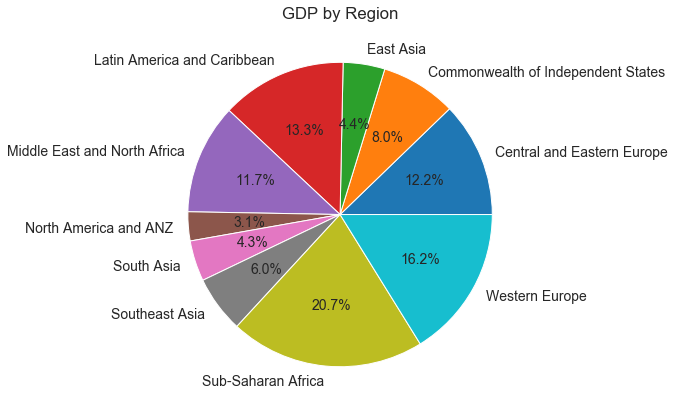

In [56]:
gdp.plot.pie(autopct = '%1.1f%%')
plt.title('GDP by Region')
plt.ylabel('')

In [58]:
# Total countries

total_country = happiness_df.groupby('regional_indicator')[['country']].count()
print(total_country)

                                    country
regional_indicator                         
Central and Eastern Europe               17
Commonwealth of Independent States       12
East Asia                                 6
Latin America and Caribbean              20
Middle East and North Africa             17
North America and ANZ                     4
South Asia                                7
Southeast Asia                            9
Sub-Saharan Africa                       36
Western Europe                           21


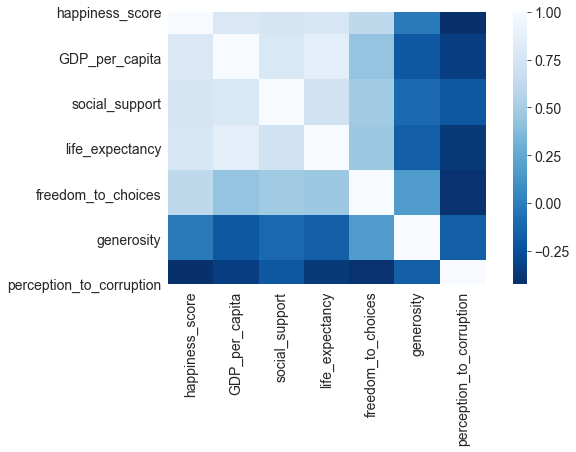

In [64]:
# corr map

cor = happiness_df.corr(method = 'pearson')
f, ax = plt.subplots(figsize = (10, 5))
sns.heatmap(cor, mask = np.zeros_like(cor, dtype=np.bool),
            cmap='Blues_r', square=True, ax=ax)

In [67]:
# corruption in regions

corruption = happiness_df.groupby('regional_indicator')[['perception_to_corruption']].mean()
corruption

,perception_to_corruption
regional_indicator,
Central and Eastern Europe,0.850529
Commonwealth of Independent States,0.725083
East Asia,0.683333
Latin America and Caribbean,0.792600
Middle East and North Africa,0.762235
North America and ANZ,0.449250
South Asia,0.797429
Southeast Asia,0.709111
Sub-Saharan Africa,0.765944


<BarContainer object of 10 artists>

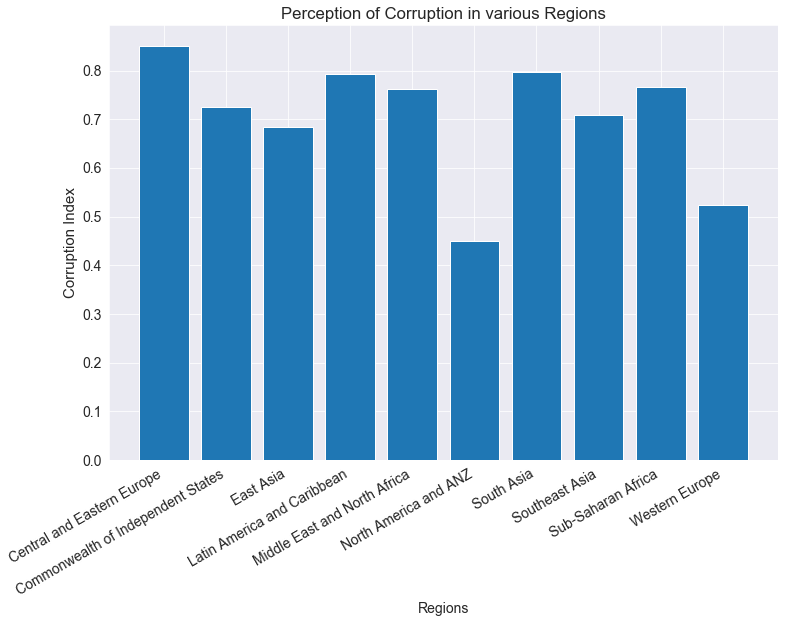

In [69]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.title('Perception of Corruption in various Regions')
plt.xlabel('Regions', fontsize =14)
plt.ylabel('Corruption Index', fontsize = 15)
plt.xticks(rotation = 30, ha='right')
plt.bar(corruption.index, corruption.perception_to_corruption)

Text(0, 0.5, 'Corruption')

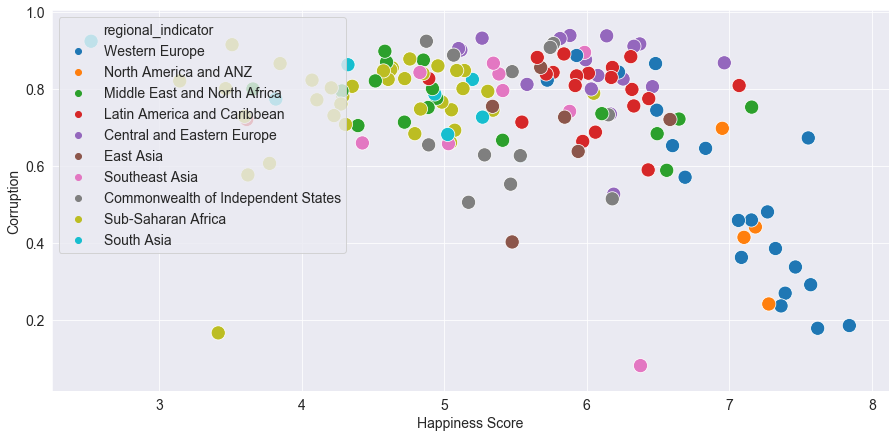

In [73]:
# corruption vs happiness

plt.rcParams['figure.figsize']=(15, 7)
sns.scatterplot(x = happiness_df.happiness_score, y = happiness_df.perception_to_corruption, hue = happiness_df.regional_indicator, s = 200)
plt.legend(loc='upper left', fontsize = '14')
plt.xlabel('Happiness Score')
plt.ylabel('Corruption')

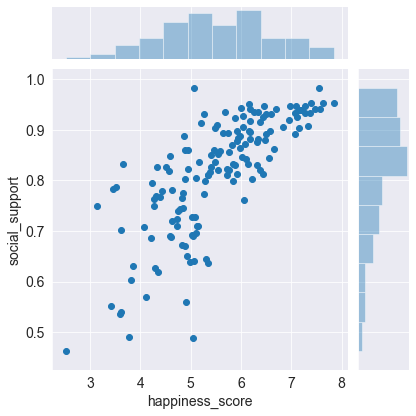

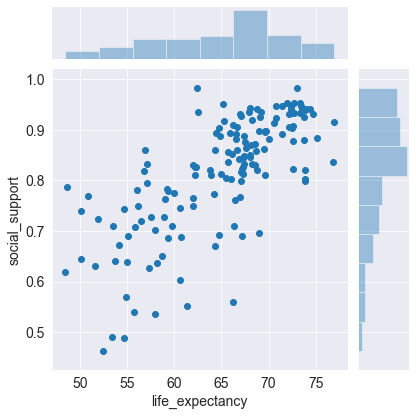

In [76]:
sns.jointplot(data=happiness_df, x='happiness_score', y='social_support')
sns.jointplot(data=happiness_df, x='life_expectancy', y = 'social_support')
#lt.savefig('Plots/jointplot.png')

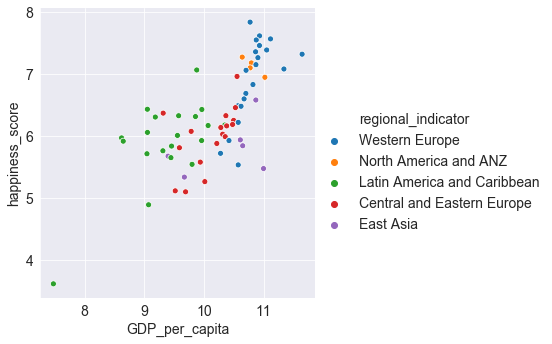

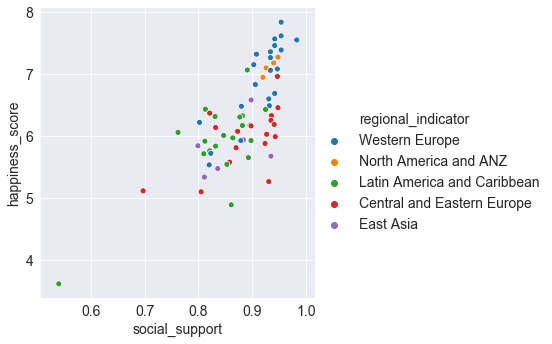

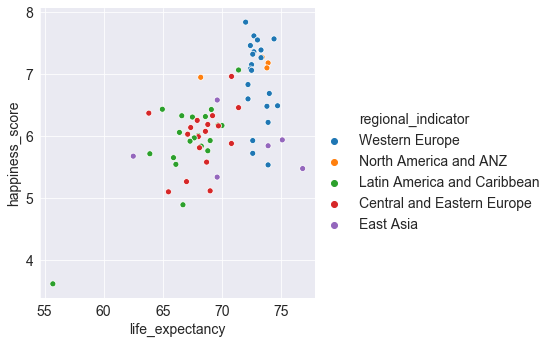

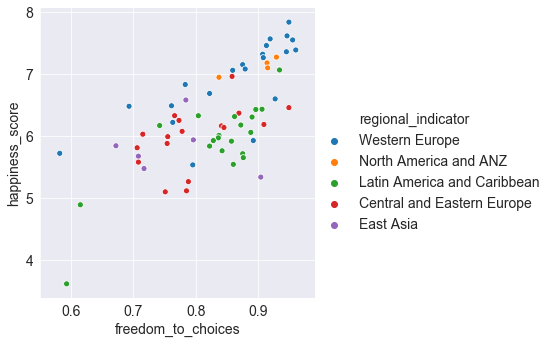

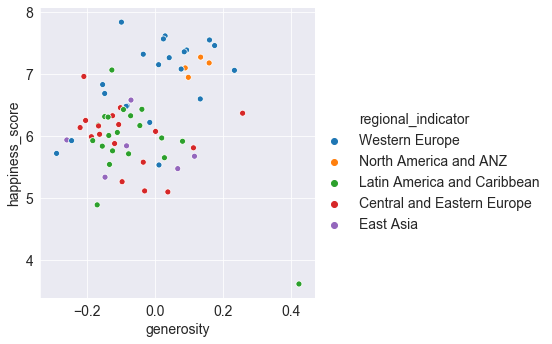

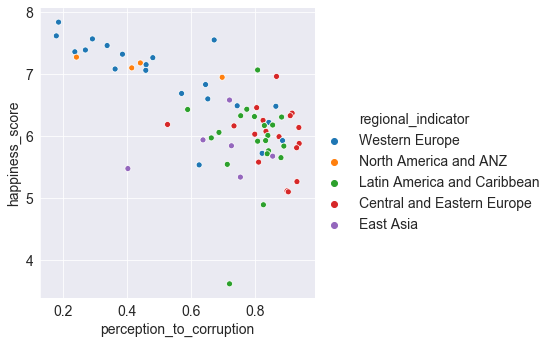

In [78]:
for col in happiness_df[['GDP_per_capita', 'social_support', 'life_expectancy', 'freedom_to_choices', 'generosity', 'perception_to_corruption']]:
    sns.relplot(data = happiness_df[happiness_df['regional_indicator'].isin(happiness_df.groupby('regional_indicator').mean().sort_values(by = 'happiness_score', ascending = False)[:5].index)], x = col, y = 'happiness_score', hue='regional_indicator')